In [ ]:
import os
import torch
import timm
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from PIL import Image
import cv2
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix

mean=[0.588,0.459,0.402]
std=[0.228,0.202,0.190]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# RAF-DB

In [26]:
# checkpoint
checkpoint_dir_5 = "./Experiments_checkpoints/SSFER_RAFDB_0.05_model.pth"
checkpoint_5 = torch.load(checkpoint_dir_5)
checkpoint_dir_10 = "./Experiments_checkpoints/SSFER_RAFDB_0.10_model.pth"
checkpoint_10 = torch.load(checkpoint_dir_10)
checkpoint_dir_25 = "./Experiments_checkpoints/SSFER_RAFDB_0.25_model.pth"
checkpoint_25 = torch.load(checkpoint_dir_25)


# Load model
num_classes = 7
SSFER_5 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_5.load_state_dict(checkpoint_5, strict=True)
SSFER_5.to(device)

SSFER_10 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_10.load_state_dict(checkpoint_10, strict=True)
SSFER_10.to(device)

SSFER_25 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_25.load_state_dict(checkpoint_25, strict=True)
SSFER_25.to(device)

RAFDB_test_dataset = datasets.ImageFolder('./RAF-DB/test', transform=test_transform)
sampler_test = torch.utils.data.SequentialSampler(RAFDB_test_dataset)
test_loader = torch.utils.data.DataLoader(RAFDB_test_dataset, sampler = sampler_test, batch_size = 32,num_workers = 0, pin_memory = True,drop_last = False)


RAFDB_label_mapping = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}

In [27]:
# SSFER-5%
SSFER_5.eval()
y_pred_5 = []
y_true_5 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_5(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_5 = y_pred_5 + predicts.tolist()
        y_true_5 = y_true_5 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_5 = [RAFDB_label_mapping[label] for label in y_true_5]
y_pred_5 = [RAFDB_label_mapping[label] for label in y_pred_5]

cm_5 = confusion_matrix(y_true_5, y_pred_5)
cm_prob_5 = cm_5.astype('float') / cm_5.sum(axis=1)[:, np.newaxis]


# SSFER-10%
SSFER_10.eval()
y_pred_10 = []
y_true_10 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_10(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_10 = y_pred_10 + predicts.tolist()
        y_true_10 = y_true_10 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_10 = [RAFDB_label_mapping[label] for label in y_true_10]
y_pred_10 = [RAFDB_label_mapping[label] for label in y_pred_10]

cm_10 = confusion_matrix(y_true_10, y_pred_10)
cm_prob_10 = cm_10.astype('float') / cm_10.sum(axis=1)[:, np.newaxis]



# SSFER-25%
SSFER_25.eval()
y_pred_25 = []
y_true_25 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_25(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_25 = y_pred_25 + predicts.tolist()
        y_true_25 = y_true_25 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_25 = [RAFDB_label_mapping[label] for label in y_true_25]
y_pred_25 = [RAFDB_label_mapping[label] for label in y_pred_25]

cm_25 = confusion_matrix(y_true_25, y_pred_25)
cm_prob_25 = cm_25.astype('float') / cm_25.sum(axis=1)[:, np.newaxis]



100%|██████████| 96/96 [01:25<00:00,  1.12it/s]


test acc:0.8129073977470398



100%|██████████| 96/96 [01:29<00:00,  1.07it/s]


test acc:0.8536505699157715



100%|██████████| 96/96 [01:32<00:00,  1.03it/s]

test acc:0.8888526558876038



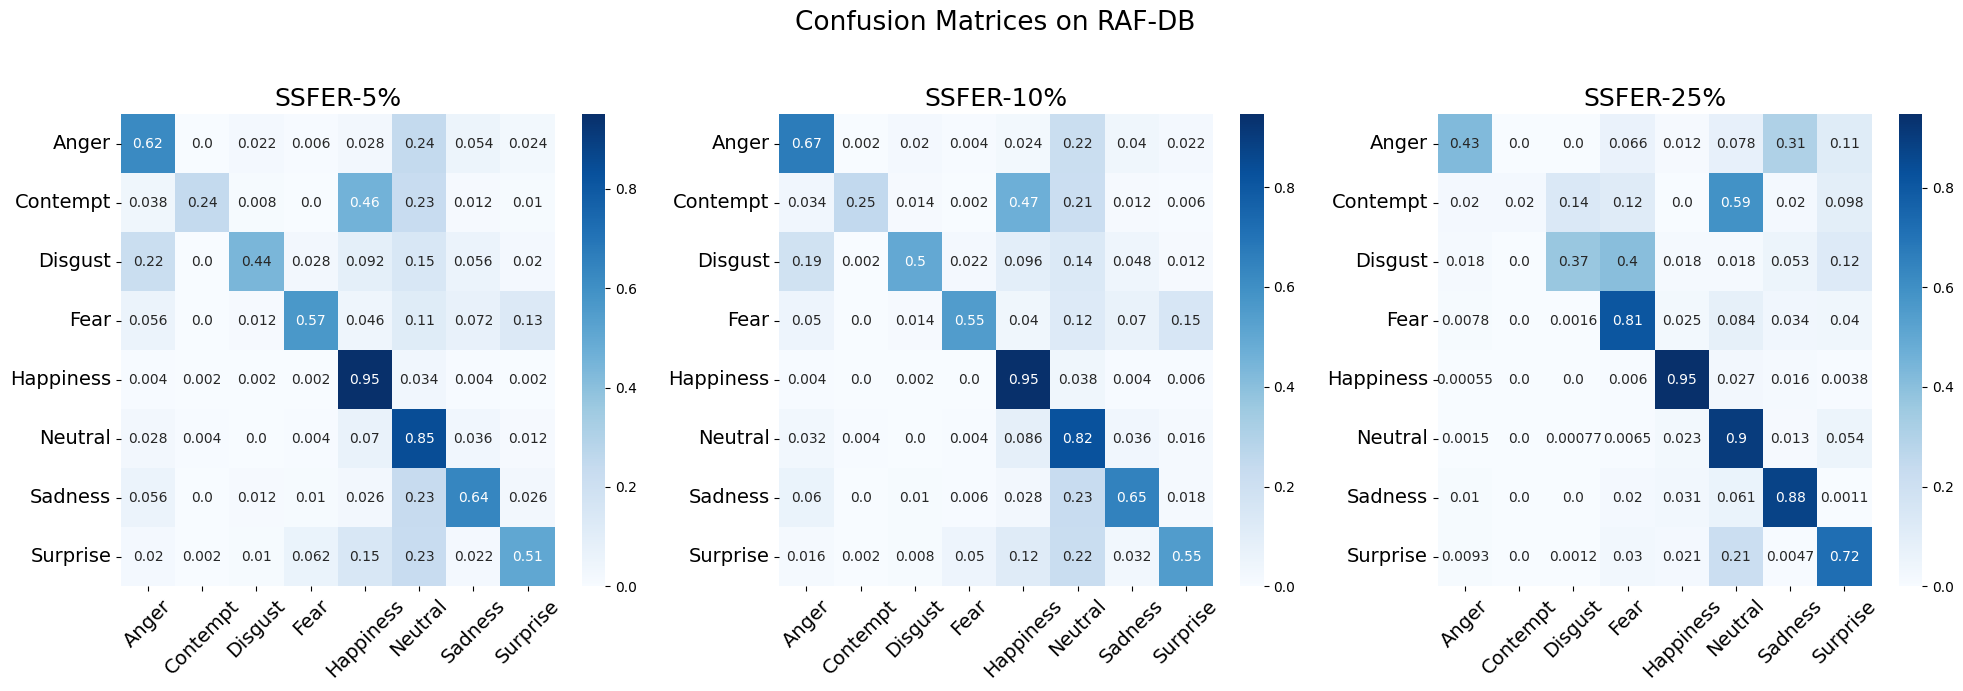

In [55]:
# 创建一个子图网格，1行3列
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# 第一个子图
sns.heatmap(cm_prob_5, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_5), yticklabels=np.unique(y_true_5), ax=axes[0])
axes[0].set_title('SSFER-5%', fontsize=18)
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', rotation=0, labelsize=14)

# 第二个子图
sns.heatmap(cm_prob_10, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_10), yticklabels=np.unique(y_true_10), ax=axes[1])
axes[1].set_title('SSFER-10%', fontsize=18)
axes[1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1].tick_params(axis='y', rotation=0, labelsize=14)

# 第三个子图
sns.heatmap(cm_prob_25, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_25), yticklabels=np.unique(y_true_25), ax=axes[2])
axes[2].set_title('SSFER-25%', fontsize=18)
axes[2].tick_params(axis='x', rotation=45, labelsize=14)
axes[2].tick_params(axis='y', rotation=0, labelsize=14)

fig.suptitle('Confusion Matrices on RAF-DB', fontsize=19)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('RAFDB_confusion_matrices.jpg', dpi=400, bbox_inches='tight')
plt.show()

# FERPlus

In [29]:
# checkpoint
checkpoint_dir_5 = "./Experiments_checkpoints/SSFER_FERPlus_0.05_model.pth"
checkpoint_5 = torch.load(checkpoint_dir_5)
checkpoint_dir_10 = "./Experiments_checkpoints/SSFER_FERPlus_0.10_model.pth"
checkpoint_10 = torch.load(checkpoint_dir_10)
checkpoint_dir_25 = "./Experiments_checkpoints/SSFER_FERPlus_0.25_model.pth"
checkpoint_25 = torch.load(checkpoint_dir_25)

# Load model
num_classes = 8
SSFER_5 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_5.load_state_dict(checkpoint_5, strict=True)
SSFER_5.to(device)

SSFER_10 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_10.load_state_dict(checkpoint_10, strict=True)
SSFER_10.to(device)

SSFER_25 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_25.load_state_dict(checkpoint_25, strict=True)
SSFER_25.to(device)

FERPlus_test_dataset = datasets.ImageFolder('./FERPlus/test', transform=test_transform)
sampler_test = torch.utils.data.SequentialSampler(FERPlus_test_dataset)
test_loader = torch.utils.data.DataLoader(FERPlus_test_dataset, sampler = sampler_test, batch_size = 32,num_workers = 0, pin_memory = True,drop_last = False)


FERPlus_label_mapping = {0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'}

In [30]:
# SSFER-5%
SSFER_5.eval()
y_pred_5 = []
y_true_5 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_5(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_5 = y_pred_5 + predicts.tolist()
        y_true_5 = y_true_5 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_5 = [FERPlus_label_mapping[label] for label in y_true_5]
y_pred_5 = [FERPlus_label_mapping[label] for label in y_pred_5]

cm_5 = confusion_matrix(y_true_5, y_pred_5)
cm_prob_5 = cm_5.astype('float') / cm_5.sum(axis=1)[:, np.newaxis]


# SSFER-10%
SSFER_10.eval()
y_pred_10 = []
y_true_10 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = SSFER_10(inputs)
        _, predicts = torch.max(outputs, 1)
        y_pred_10 = y_pred_10 + predicts.tolist()
        y_true_10 = y_true_10 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_10 = [FERPlus_label_mapping[label] for label in y_true_10]
y_pred_10 = [FERPlus_label_mapping[label] for label in y_pred_10]

cm_10 = confusion_matrix(y_true_10, y_pred_10)
cm_prob_10 = cm_10.astype('float') / cm_10.sum(axis=1)[:, np.newaxis]



# SSFER-25%
SSFER_25.eval()
y_pred_25 = []
y_true_25 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_25(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_25 = y_pred_25 + predicts.tolist()
        y_true_25 = y_true_25 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_25 = [FERPlus_label_mapping[label] for label in y_true_25]
y_pred_25 = [FERPlus_label_mapping[label] for label in y_pred_25]

cm_25 = confusion_matrix(y_true_25, y_pred_25)
cm_prob_25 = cm_25.astype('float') / cm_25.sum(axis=1)[:, np.newaxis]

100%|██████████| 222/222 [05:06<00:00,  1.38s/it]


test acc:0.8194112181663513



100%|██████████| 222/222 [05:20<00:00,  1.44s/it]


test acc:0.8389914035797119



100%|██████████| 222/222 [04:23<00:00,  1.19s/it]

test acc:0.8581490516662598



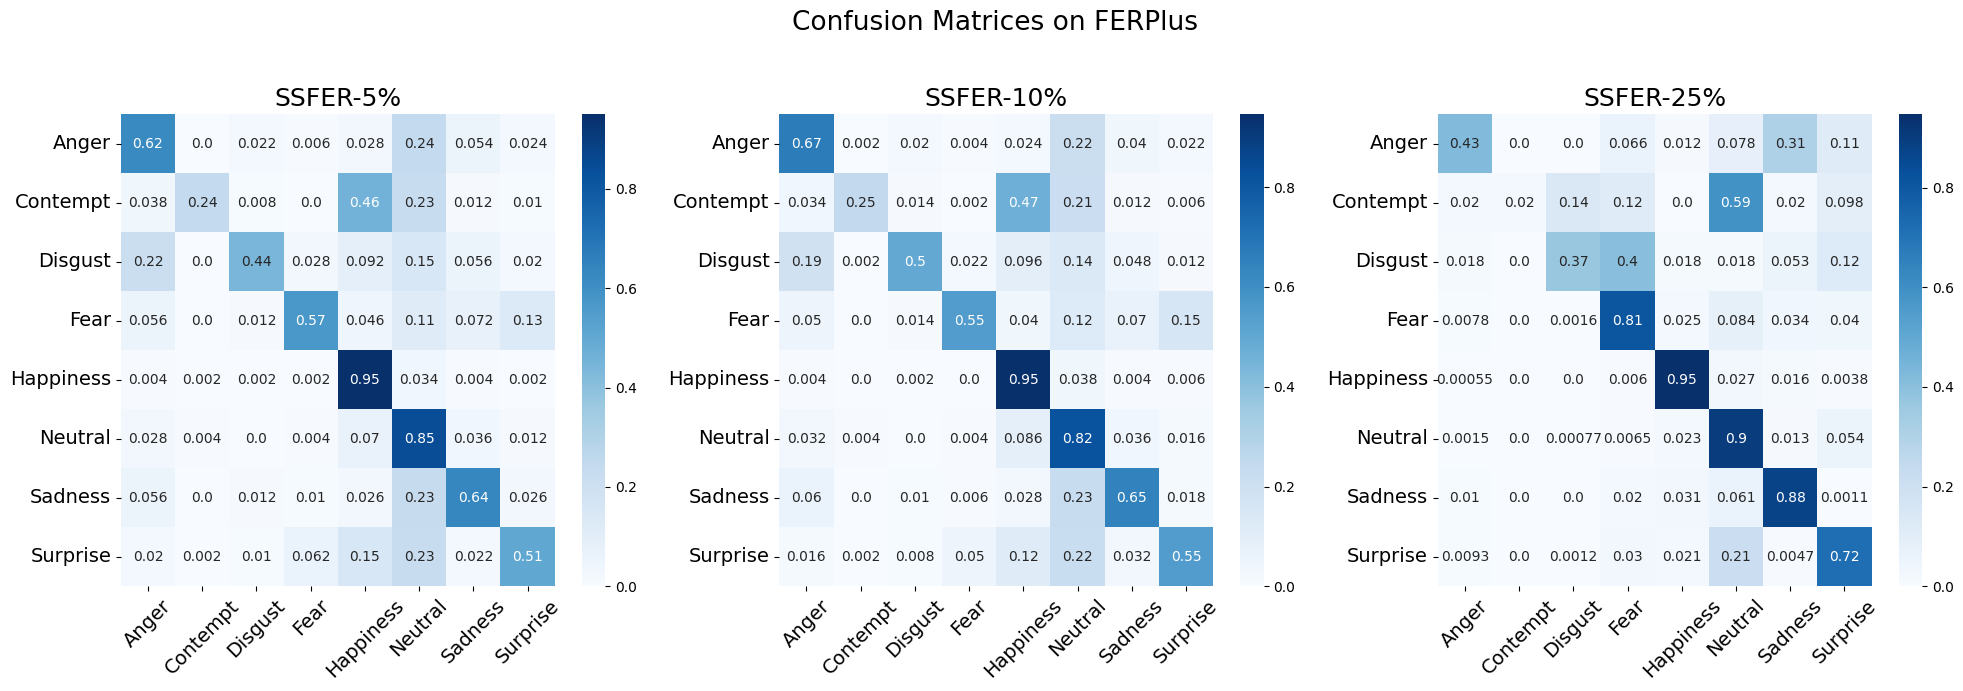

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(20, 7))


sns.heatmap(cm_prob_5, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_5), yticklabels=np.unique(y_true_5), ax=axes[0])
axes[0].set_title('SSFER-5%', fontsize=18)
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', rotation=0, labelsize=14)


sns.heatmap(cm_prob_10, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_10), yticklabels=np.unique(y_true_10), ax=axes[1])
axes[1].set_title('SSFER-10%', fontsize=18)
axes[1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1].tick_params(axis='y', rotation=0, labelsize=14)


sns.heatmap(cm_prob_25, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_25), yticklabels=np.unique(y_true_25), ax=axes[2])
axes[2].set_title('SSFER-25%', fontsize=18)
axes[2].tick_params(axis='x', rotation=45, labelsize=14)
axes[2].tick_params(axis='y', rotation=0, labelsize=14)

fig.suptitle('Confusion Matrices on FERPlus', fontsize=19)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('FERPlus_confusion_matrices.jpg', dpi=400, bbox_inches='tight')
plt.show()


# AffectNet-7

In [45]:
# checkpoint
checkpoint_dir_1 = "./Experiments_checkpoints/SSFER_AffectNet7_0.01_model.pth"
checkpoint_1 = torch.load(checkpoint_dir_1)
checkpoint_dir_5 = "./Experiments_checkpoints/SSFER_AffectNet7_0.05_model.pth"
checkpoint_5 = torch.load(checkpoint_dir_5)
checkpoint_dir_10 = "./Experiments_checkpoints/SSFER_AffectNet7_0.10_model.pth"
checkpoint_10 = torch.load(checkpoint_dir_10)

# Load model
num_classes = 7
SSFER_1 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_1.load_state_dict(checkpoint_1, strict=True)
SSFER_1.to(device)

SSFER_5 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_5.load_state_dict(checkpoint_5, strict=True)
SSFER_5.to(device)

SSFER_10 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_10.load_state_dict(checkpoint_10, strict=True)
SSFER_10.to(device)

AffectNet7_test_dataset = datasets.ImageFolder('./AffectNet-7/test', transform=test_transform)
sampler_test = torch.utils.data.SequentialSampler(AffectNet7_test_dataset)
test_loader = torch.utils.data.DataLoader(AffectNet7_test_dataset, sampler = sampler_test, batch_size = 32,num_workers = 0, pin_memory = True,drop_last = False)


AffectNet7_label_mapping = {0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger'}

In [46]:
# SSFER-1%
SSFER_1.eval()
y_pred_1 = []
y_true_1 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_1(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_1 = y_pred_1 + predicts.tolist()
        y_true_1 = y_true_1 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_1 = [AffectNet7_label_mapping[label] for label in y_true_1]
y_pred_1 = [AffectNet7_label_mapping[label] for label in y_pred_1]

cm_1 = confusion_matrix(y_true_1, y_pred_1)
cm_prob_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]



# SSFER-5%
SSFER_5.eval()
y_pred_5 = []
y_true_5 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_5(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_5 = y_pred_5 + predicts.tolist()
        y_true_5 = y_true_5 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_5 = [AffectNet7_label_mapping[label] for label in y_true_5]
y_pred_5 = [AffectNet7_label_mapping[label] for label in y_pred_5]

cm_5 = confusion_matrix(y_true_5, y_pred_5)
cm_prob_5 = cm_5.astype('float') / cm_5.sum(axis=1)[:, np.newaxis]




# SSFER-10%
SSFER_10.eval()
y_pred_10 = []
y_true_10 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_10(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_10 = y_pred_10 + predicts.tolist()
        y_true_10 = y_true_10 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_10 = [AffectNet7_label_mapping[label] for label in y_true_10]
y_pred_10 = [AffectNet7_label_mapping[label] for label in y_pred_10]

cm_10 = confusion_matrix(y_true_10, y_pred_10)
cm_prob_10 = cm_10.astype('float') / cm_10.sum(axis=1)[:, np.newaxis]

100%|██████████| 110/110 [05:39<00:00,  3.09s/it]


test acc:0.5982857346534729



100%|██████████| 110/110 [05:33<00:00,  3.03s/it]


test acc:0.6405714154243469



100%|██████████| 110/110 [05:14<00:00,  2.86s/it]

test acc:0.6534285545349121



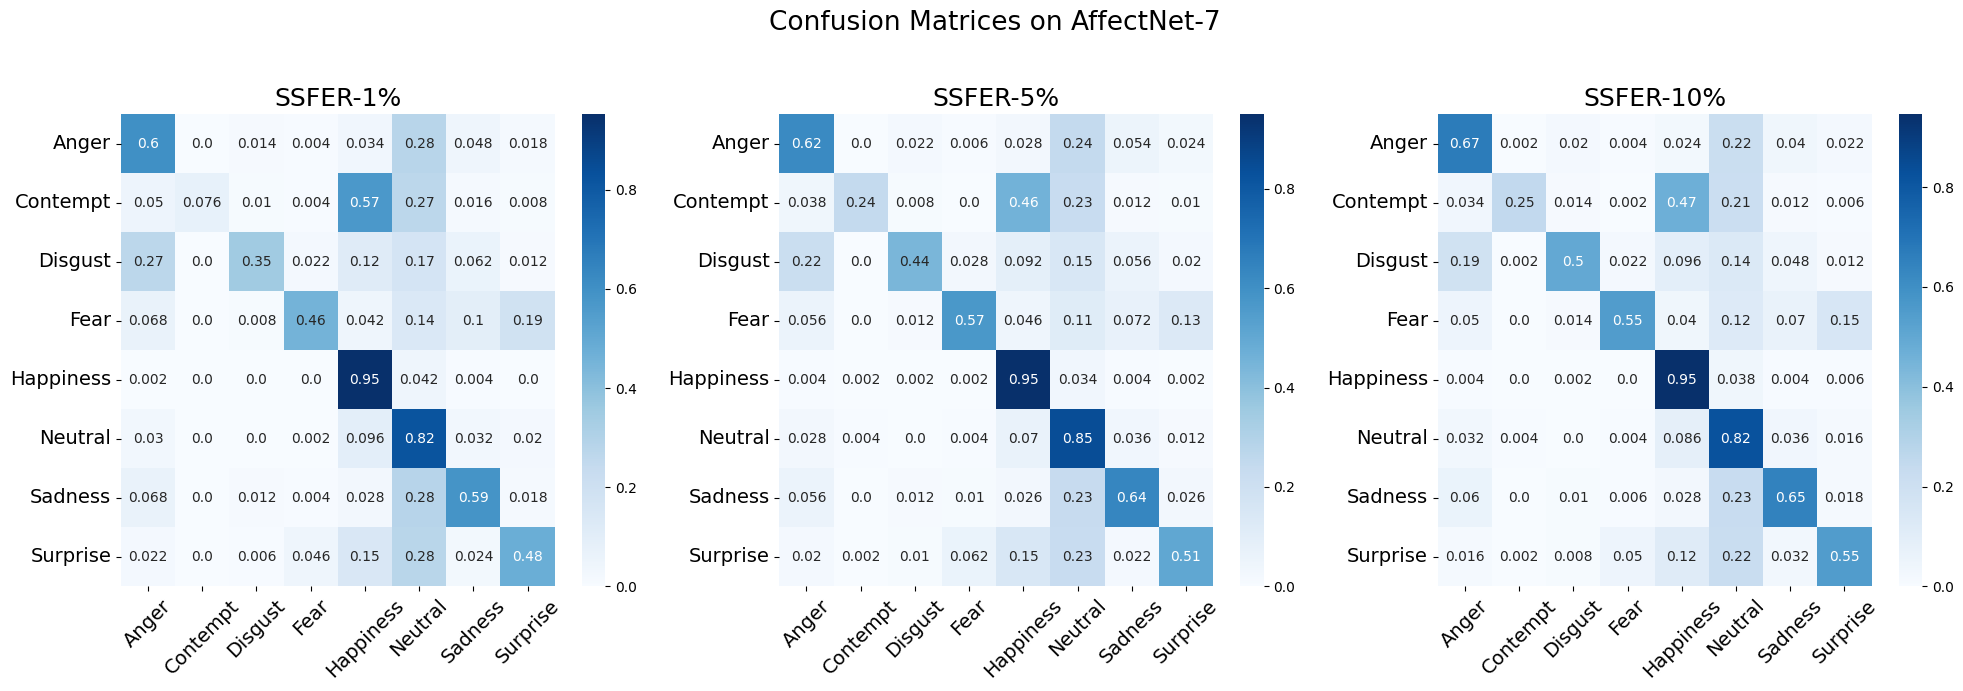

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))


sns.heatmap(cm_prob_1, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_1), yticklabels=np.unique(y_true_1), ax=axes[0])
axes[0].set_title('SSFER-1%', fontsize=18)
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', rotation=0, labelsize=14)


sns.heatmap(cm_prob_5, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_5), yticklabels=np.unique(y_true_5), ax=axes[1])
axes[1].set_title('SSFER-5%', fontsize=18)
axes[1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1].tick_params(axis='y', rotation=0, labelsize=14)


sns.heatmap(cm_prob_10, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_10), yticklabels=np.unique(y_true_10), ax=axes[2])
axes[2].set_title('SSFER-10%', fontsize=18)
axes[2].tick_params(axis='x', rotation=45, labelsize=14)
axes[2].tick_params(axis='y', rotation=0, labelsize=14)


fig.suptitle('Confusion Matrices on AffectNet-7', fontsize=19)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('AffectNet7_confusion_matrices.jpg', dpi=400, bbox_inches='tight')
plt.show()


# AffectNet-8

In [48]:
# checkpoint
checkpoint_dir_1 = "./Experiments_checkpoints/SSFER_AffectNet8_0.01_model.pth"
checkpoint_1 = torch.load(checkpoint_dir_1)
checkpoint_dir_5 = "./Experiments_checkpoints/SSFER_AffectNet8_0.05_model.pth"
checkpoint_5 = torch.load(checkpoint_dir_5)
checkpoint_dir_10 = "./Experiments_checkpoints/SSFER_AffectNet8_0.10_model.pth"
checkpoint_10 = torch.load(checkpoint_dir_10)

# Load model
num_classes = 8
SSFER_1 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_1.load_state_dict(checkpoint_1, strict=True)
SSFER_1.to(device)

SSFER_5 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_5.load_state_dict(checkpoint_5, strict=True)
SSFER_5.to(device)

SSFER_10 = timm.create_model('vit_base_patch16_224.augreg2_in21k_ft_in1k', pretrained=False, num_classes=num_classes)
SSFER_10.load_state_dict(checkpoint_10, strict=True)
SSFER_10.to(device)

AffectNet8_test_dataset = datasets.ImageFolder('./AffectNet-8/test', transform=test_transform)
sampler_test = torch.utils.data.SequentialSampler(AffectNet8_test_dataset)
test_loader = torch.utils.data.DataLoader(AffectNet8_test_dataset, sampler = sampler_test, batch_size = 32,num_workers = 0, pin_memory = True,drop_last = False)


AffectNet8_label_mapping = {0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'}

In [49]:
# SSFER-1%
SSFER_1.eval()
y_pred_1 = []
y_true_1 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_1(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_1 = y_pred_1 + predicts.tolist()
        y_true_1 = y_true_1 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_1 = [AffectNet8_label_mapping[label] for label in y_true_1]
y_pred_1 = [AffectNet8_label_mapping[label] for label in y_pred_1]

cm_1 = confusion_matrix(y_true_1, y_pred_1)
cm_prob_1 = cm_1.astype('float') / cm_1.sum(axis=1)[:, np.newaxis]


# SSFER-5%
SSFER_5.eval()
y_pred_5 = []
y_true_5 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_5(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_5 = y_pred_5 + predicts.tolist()
        y_true_5 = y_true_5 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_5 = [AffectNet8_label_mapping[label] for label in y_true_5]
y_pred_5 = [AffectNet8_label_mapping[label] for label in y_pred_5]

cm_5 = confusion_matrix(y_true_5, y_pred_5)
cm_prob_5 = cm_5.astype('float') / cm_5.sum(axis=1)[:, np.newaxis]



# SSFER-10%
SSFER_10.eval()
y_pred_10 = []
y_true_10 = []
with torch.no_grad():
    running_loss = 0.0
    correct_sum = 0

    for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = SSFER_10(inputs)


        _, predicts = torch.max(outputs, 1)
        y_pred_10 = y_pred_10 + predicts.tolist()
        y_true_10 = y_true_10 + labels.tolist()
        correct_sum += torch.sum(predicts == labels.data)

    test_acc = correct_sum.float() / len(test_loader.dataset)
    print(f"test acc:{test_acc.item()}")
    print()
y_true_10 = [AffectNet8_label_mapping[label] for label in y_true_10]
y_pred_10 = [AffectNet8_label_mapping[label] for label in y_pred_10]

cm_10 = confusion_matrix(y_true_10, y_pred_10)
cm_prob_10 = cm_10.astype('float') / cm_10.sum(axis=1)[:, np.newaxis]



100%|██████████| 125/125 [02:02<00:00,  1.02it/s]


test acc:0.5392500162124634



100%|██████████| 125/125 [01:54<00:00,  1.09it/s]


test acc:0.6015000343322754



100%|██████████| 125/125 [01:52<00:00,  1.11it/s]

test acc:0.6170000433921814



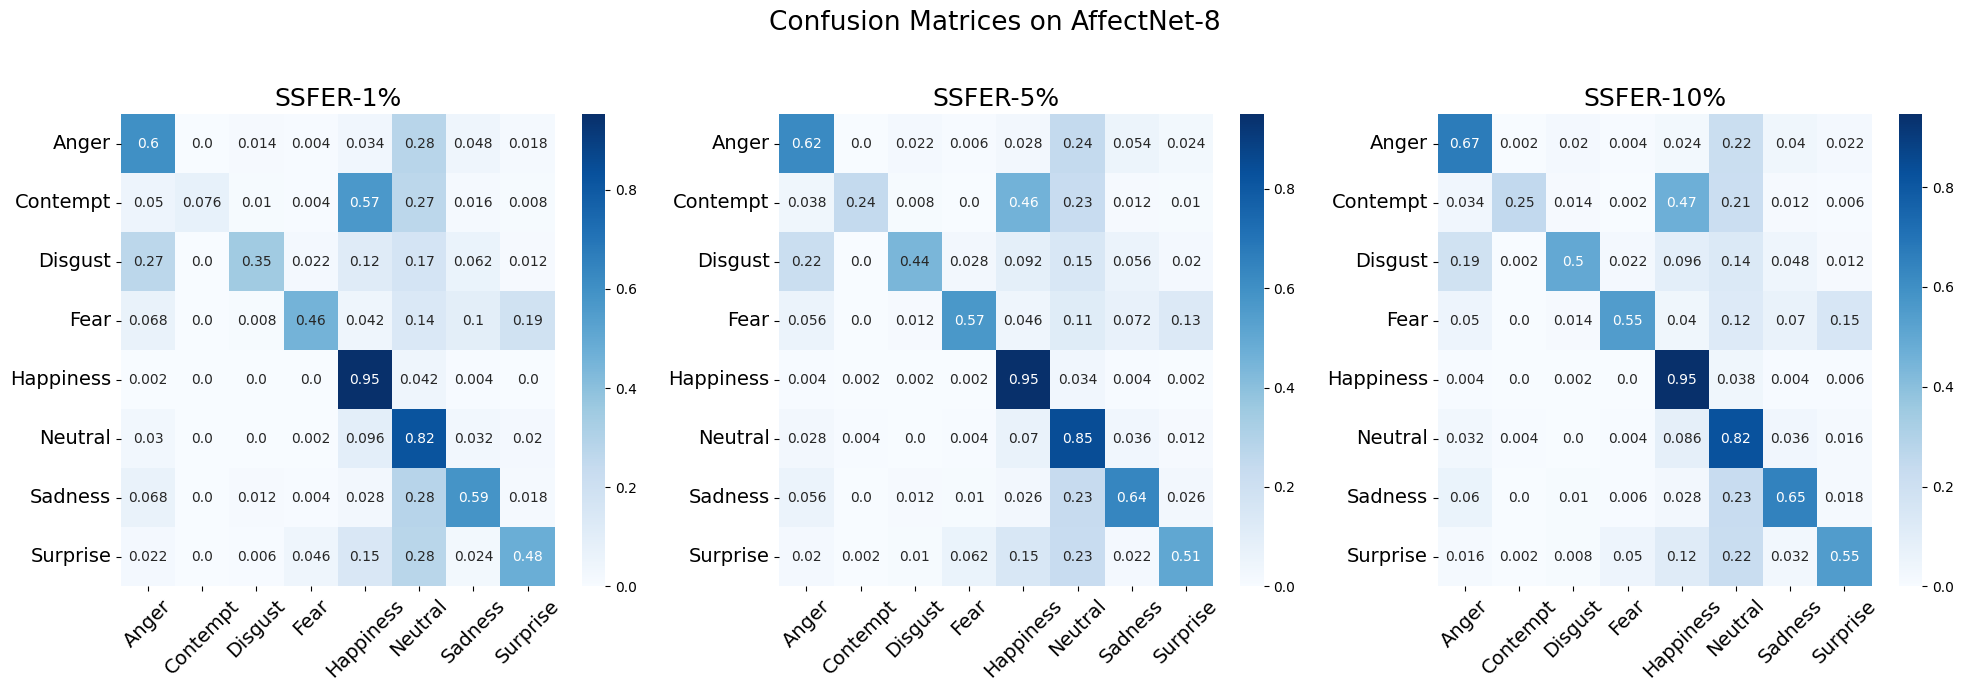

In [58]:

fig, axes = plt.subplots(1, 3, figsize=(20, 7))


sns.heatmap(cm_prob_1, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_1), yticklabels=np.unique(y_true_1), ax=axes[0])
axes[0].set_title('SSFER-1%', fontsize=18)
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', rotation=0, labelsize=14)


sns.heatmap(cm_prob_5, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_5), yticklabels=np.unique(y_true_5), ax=axes[1])
axes[1].set_title('SSFER-5%', fontsize=18)
axes[1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1].tick_params(axis='y', rotation=0, labelsize=14)


sns.heatmap(cm_prob_10, annot=True, fmt='.2', cmap='Blues',
            xticklabels=np.unique(y_true_10), yticklabels=np.unique(y_true_10), ax=axes[2])
axes[2].set_title('SSFER-10%', fontsize=18)
axes[2].tick_params(axis='x', rotation=45, labelsize=14)
axes[2].tick_params(axis='y', rotation=0, labelsize=14)


fig.suptitle('Confusion Matrices on AffectNet-8', fontsize=19)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('AffectNet8_confusion_matrices.jpg', dpi=400, bbox_inches='tight')
plt.show()
